<a href="https://colab.research.google.com/github/sandeep1847e/MSc-Project/blob/main/codes/Jet_2_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install uproot
# !pip install fastjet
# !pip install awkward

In [2]:
import uproot
import fastjet as fj
import numpy as np
import awkward as ak

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [3]:
import requests

# URL of the .root file
url = "https://github.com/sandeep1847e/MSc-Project/blob/main/Events/pp24tops100E.root?raw=true"

# Download the file
response = requests.get(url)
with open("pp24tops100E.root", "wb") as file:
    file.write(response.content)

print("Download complete!")


Download complete!


In [4]:
file = uproot.open("pp24tops100E.root")
print(file.keys())
tree = file["Delphes;1"]
print(tree.keys())


['ProcessID0;1', 'Delphes;1']
['Event', 'Event/Event.fUniqueID', 'Event/Event.fBits', 'Event/Event.Number', 'Event/Event.ReadTime', 'Event/Event.ProcTime', 'Event/Event.ProcessID', 'Event/Event.MPI', 'Event/Event.Weight', 'Event/Event.CrossSection', 'Event/Event.CrossSectionError', 'Event/Event.Scale', 'Event/Event.AlphaQED', 'Event/Event.AlphaQCD', 'Event/Event.ID1', 'Event/Event.ID2', 'Event/Event.X1', 'Event/Event.X2', 'Event/Event.ScalePDF', 'Event/Event.PDF1', 'Event/Event.PDF2', 'Event_size', 'Weight', 'Weight/Weight.fUniqueID', 'Weight/Weight.fBits', 'Weight/Weight.Weight', 'Weight_size', 'Particle', 'Particle/Particle.fUniqueID', 'Particle/Particle.fBits', 'Particle/Particle.PID', 'Particle/Particle.Status', 'Particle/Particle.IsPU', 'Particle/Particle.M1', 'Particle/Particle.M2', 'Particle/Particle.D1', 'Particle/Particle.D2', 'Particle/Particle.Charge', 'Particle/Particle.Mass', 'Particle/Particle.E', 'Particle/Particle.Px', 'Particle/Particle.Py', 'Particle/Particle.Pz', 'Pa

In [5]:

# Open the ROOT file using uproot
# # file = uproot.open("pp24tops100E.root")
# file = uproot.open("/home/sandeep/Desktop/project/root/pp24tops100E.root")

# tree = file["Delphes;1"]
# tree.keys()

In [6]:
# # Access the Jet branch
# jets = tree["Jet"].arrays()
# print(jets)
# len(jets)


In [7]:
jet=tree['Jet'].arrays()
# len(jet)

In [8]:
jet_pt=jet['Jet.PT']
jet_eta=jet['Jet.Eta']
jet_phi=jet['Jet.Phi']
jet_mass=jet['Jet.Mass']
# jet_pt
# len(jet_pt)

In [9]:
print(len(jet_pt[0]))
print(len(jet_eta[0]))
print(len(jet_phi[0]))


12
12
12


In [10]:
# j=0
# for i in range(len(jet_pt)):
#   j+=1
#   print(i)
#   print(jet_pt[i])

In [11]:
# for i, jets in enumerate(jet_pt):
#     print(f"Event {i+1} Jets (pT):")
#     for j, pt in enumerate(jets):
#         print(f"  Jet {j+1}: {pt} GeV")
#     print("-" * 30)




In [12]:
import pandas as pd
dataframes = []

# Looping through each event
for event_no, (jets_pt, jets_eta, jets_phi,jet_mass) in enumerate(zip(jet_pt, jet_eta, jet_phi,jet_mass), start=1):
    # Create a DataFrame for each event
    event_df = pd.DataFrame({
        'event_no': [event_no] * len(jets_pt),  # Event number for each jet
        'jet_no': list(range(1, len(jets_pt) + 1)),  # Jet number
        'jet_pt': jets_pt,  # Jet transverse momentum
        'jet_eta': jets_eta,  # Jet pseudorapidity
        'jet_phi': jets_phi,   # Jet azimuthal angle
        'jet_mass':jet_mass   #Jet mass
    })
    # print(event_df)
    # Append the event DataFrame to the list
    dataframes.append(event_df)

# Concatenating all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)
print(final_df)

     event_no  jet_no      jet_pt   jet_eta   jet_phi   jet_mass
0           1       1  241.495193  0.460019 -1.448582  39.646824
1           1       2  237.826965  0.347088 -0.783157  31.691496
2           1       3  199.258957  0.398137  2.450773  27.216738
3           1       4  182.664032 -0.266424  2.162557  37.204971
4           1       5  163.187836  0.506682 -2.559620  36.590450
..        ...     ...         ...       ...       ...        ...
952       100       5   75.896584  1.114269 -0.409844  17.062120
953       100       6   50.379608  2.017884 -2.982484   7.264678
954       100       7   32.481647  0.186565  2.711654   7.231027
955       100       8   25.898775 -0.736214  1.400966   4.642059
956       100       9   24.713432 -0.513103 -0.469186   4.642381

[957 rows x 6 columns]


In [13]:
len(final_df)

957

In [14]:
# distance_threshold=300
# all_graphs = []

# for event_no in final_df['event_no'].unique():
#     event_data = final_df[final_df['event_no'] == event_no]
#     G_event = nx.Graph()

#     # Add nodes for each jet in the event
#     for idx, row in event_data.iterrows():
#         G_event.add_node(row['jet_no'], pt=row['jet_pt'], eta=row['jet_eta'], phi=row['jet_phi'])

#     # Add edges based on distance
#     for i in range(len(event_data)):
#         for j in range(i + 1, len(event_data)):
#             # Calculate distance (using pt, eta, phi)
#             pt1, eta1, phi1 = event_data.iloc[i][['jet_pt', 'jet_eta', 'jet_phi']]
#             pt2, eta2, phi2 = event_data.iloc[j][['jet_pt', 'jet_eta', 'jet_phi']]
#             distance = ((eta1 - eta2)**2 + (phi1 - phi2)**2 + (pt1 - pt2)**2)**0.5  # Example metric

#             if distance < distance_threshold:
#                 G_event.add_edge(event_data.iloc[i]['jet_no'], event_data.iloc[j]['jet_no'])

#     all_graphs.append(G_event)

# # Now `all_graphs` contains separate graphs for each event


In [15]:
# for i, G_event in enumerate(all_graphs[1:31]):
#     plt.figure(figsize=(4, 4))
#     pos = nx.spring_layout(G_event)
#     nx.draw(G_event, pos, with_labels=True, node_size=50, node_color='blue', edge_color='gray', alpha=0.5)
#     plt.title(f'Jet Connectivity Graph for Event {i+1}')
#     plt.show()


In [16]:
jet_pt=jet['Jet.PT']
jet_eta=jet['Jet.Eta']
jet_phi=jet['Jet.Phi']
jet_mass=jet['Jet.Mass']



In [17]:

from sklearn.preprocessing import MinMaxScaler

dataframes = []

# Looping through each event
for event_no, (jets_pt, jets_eta, jets_phi, jet_mass) in enumerate(zip(jet_pt, jet_eta, jet_phi, jet_mass), start=1):
    # Create a DataFrame for each event
    event_df = pd.DataFrame({
        'event_no': [event_no] * len(jets_pt),  # Event number for each jet
        'jet_no': list(range(1, len(jets_pt) + 1)),  # Jet number
        'jet_pt': jets_pt,  # Jet transverse momentum
        'jet_eta': jets_eta,  # Jet pseudorapidity
        'jet_phi': jets_phi,  # Jet azimuthal angle
        'jet_mass': jet_mass  # Jet mass
    })
    dataframes.append(event_df)

# Concatenating all DataFrames into a single DataFrame
final_df = pd.concat(dataframes, ignore_index=True)

# Normalize jet properties
scaler = MinMaxScaler()
final_df[['jet_pt', 'jet_eta', 'jet_phi']] = scaler.fit_transform(final_df[['jet_pt', 'jet_eta', 'jet_phi']])

distance_threshold = 0.5  # Adjusted for normalized values
all_graphs = []

for event_no in final_df['event_no'].unique():
    event_data = final_df[final_df['event_no'] == event_no]
    G_event = nx.Graph()

    # Add nodes for each jet in the event
    for idx, row in event_data.iterrows():
        G_event.add_node(row['jet_no'], pt=row['jet_pt'], eta=row['jet_eta'], phi=row['jet_phi'])

    # Add edges based on distance
    for i in range(len(event_data)):
        for j in range(i + 1, len(event_data)):
            # Calculate distance (using normalized pt, eta, phi)
            pt1, eta1, phi1 = event_data.iloc[i][['jet_pt', 'jet_eta', 'jet_phi']]
            pt2, eta2, phi2 = event_data.iloc[j][['jet_pt', 'jet_eta', 'jet_phi']]
            distance = ((eta1 - eta2)**2 + (phi1 - phi2)**2 + (pt1 - pt2)**2)**0.5

            if distance < distance_threshold:
                G_event.add_edge(event_data.iloc[i]['jet_no'], event_data.iloc[j]['jet_no'])

    all_graphs.append(G_event)






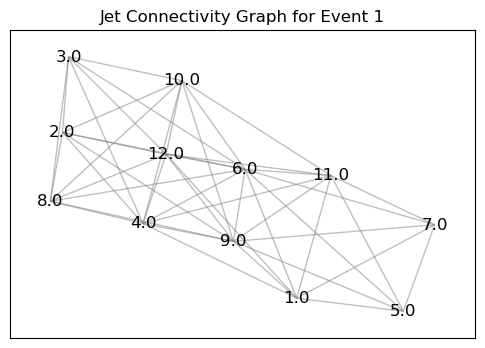

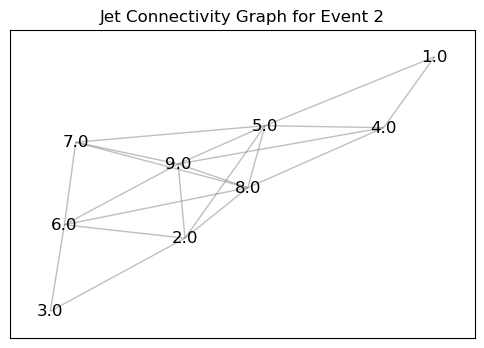

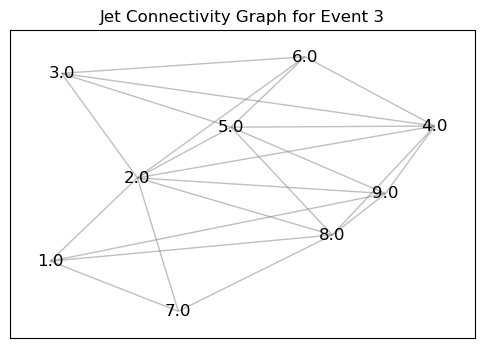

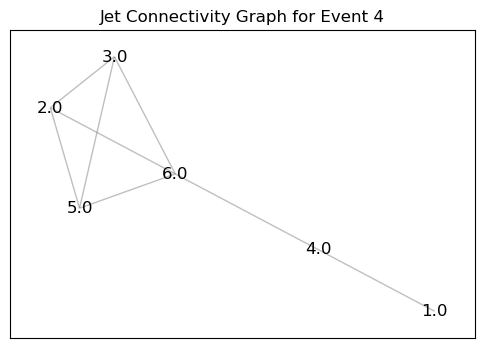

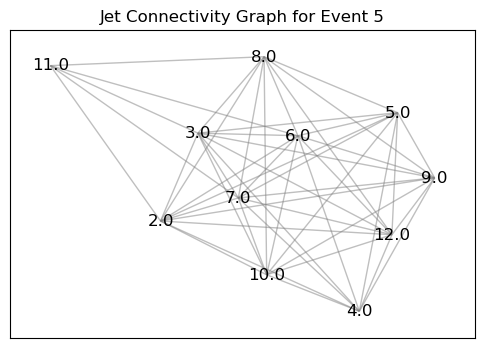

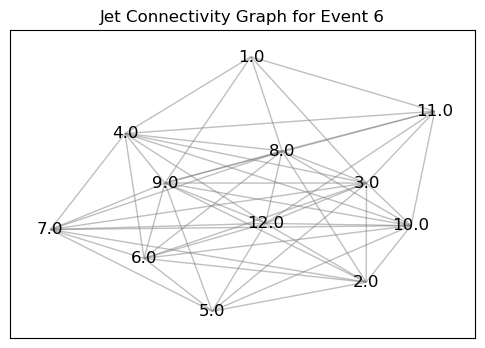

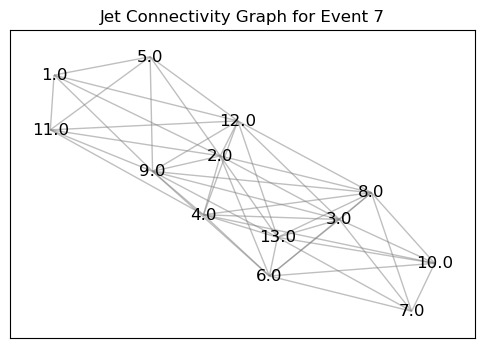

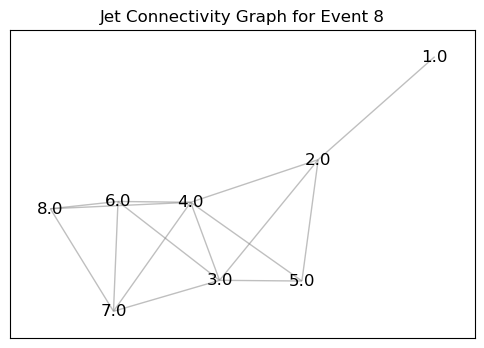

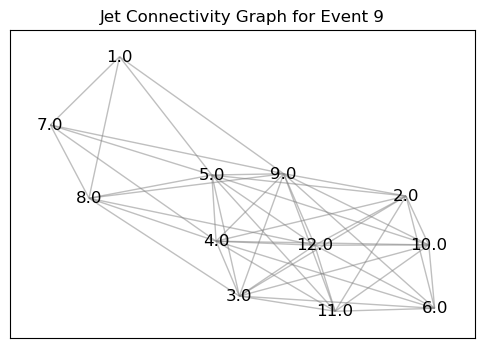

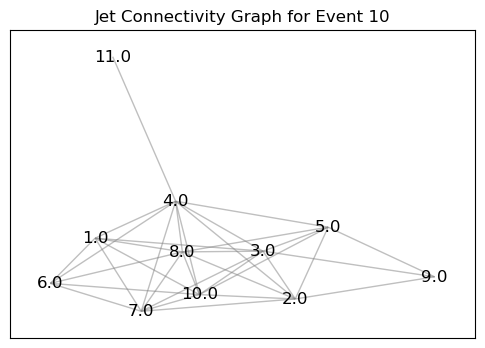

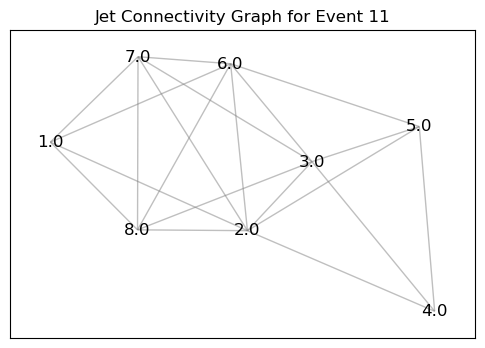

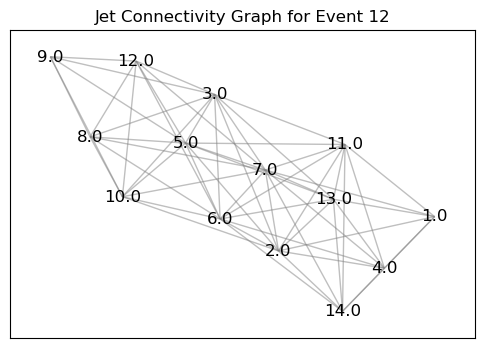

In [18]:
# Now `all_graphs` contains separate graphs for each event
for i, G_event in enumerate(all_graphs[1:13]):
    plt.figure(figsize=(6,4))
    pos = nx.spring_layout(G_event)
    node_sizes = [G_event.degree(n) * 100 for n in G_event.nodes()]  # Adjust node size by degree
    node_colors = [G_event.nodes[n]['pt'] for n in G_event.nodes()]  # Color nodes by pt

    # Draw edges
    nx.draw_networkx_edges(G_event, pos, alpha=0.5, edge_color='gray')

    # Draw labels
    nx.draw_networkx_labels(G_event, pos)
    plt.title(f'Jet Connectivity Graph for Event {i+1}')

plt.show()